# Investigation for Gridded HRW calculations

## File preamble

In [1]:
# Load dependencies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import sys
# from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.transforms as mtransforms
import cartopy.crs as ccrs
import cartopy
from dask.diagnostics import ProgressBar

In [2]:
## Set data locations

# Unix system
LOCATION_ProjectFolder = "/home/stoop/Projects/HRWclimatology/"
LOCATION_ProjectFolder_raw = LOCATION_ProjectFolder + "data/raw/"
LOCATION_ERA5NL = "/media/stoop/DataStager2/ERA5/ERA5-NL_ssrd_climatology/"

## File loading & cleaning of data

In [15]:
### Load the data
# Gridded ERA5 data for ssrd (W/m2) over the NL-region (-3-16E, 46-58N)
ds = xr.open_mfdataset(LOCATION_ERA5NL+'ERA5-NL_ssrd_*.nc', engine='netcdf4', concat_dim='time', combine='nested')



In [4]:
# Remove leap-days
ds = ds.sel(time=~((ds.time.dt.month == 2) & (ds.time.dt.day == 29))).sel(time=slice("1994-01-01", "2023-12-31"))
ds = ds.convert_calendar('noleap')

In [5]:
# Ordinal hour definition
ds["ordinal_hour"] = ds.time.dt.dayofyear * 24 + ds.time.dt.hour - 24
ds = ds.set_coords("ordinal_hour")

## Initial investigation (left for easyness)

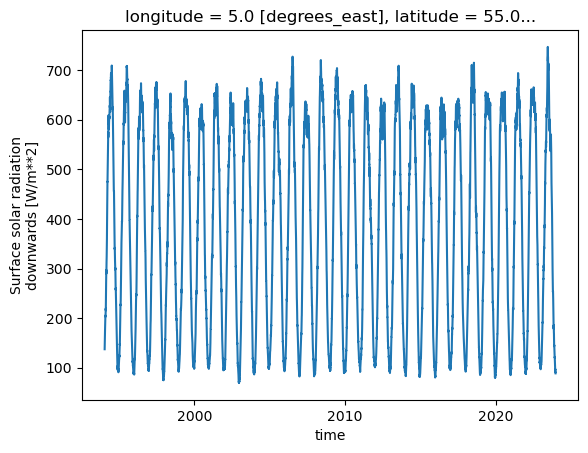

In [6]:
# Sanity check for the first step
ds.sel(time=(ds.time.dt.hour == 13)).rolling(time=40, center=True).mean().ssrd.sel(latitude=55, longitude=5, method='nearest').plot()

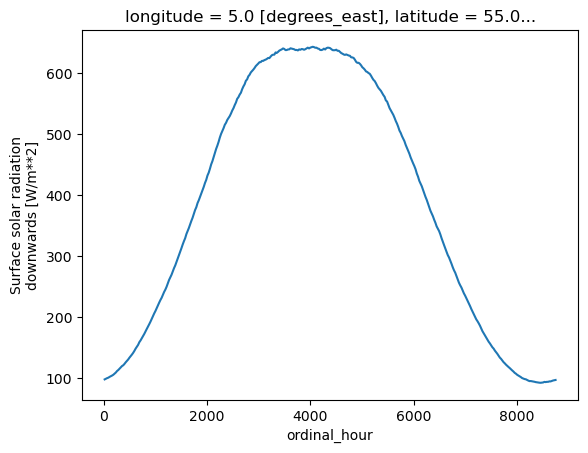

In [7]:
### Trial run and idea of the method

# make dataset for hour of day
WindowSize = 40 # days

# Rolling window operation
ds13 = ds.ssrd.sel(time=(ds.time.dt.hour == 13)).rolling(time=WindowSize, center=True).mean()

# HRW climatology
dsHRW13 = ds13.groupby(ds.sel(time=(ds.time.dt.hour == 13)).ordinal_hour).mean()

# Plotting for sanity check
dsHRW13.sel(latitude=55, longitude=5, method='nearest').plot()

## First brute-force method --> but it works!

In [8]:
# Rolling window operation for each hour of the day
ds00 = ds.ssrd.sel(time=(ds.time.dt.hour == 0)).rolling(time=WindowSize, center=True).mean()
ds01 = ds.ssrd.sel(time=(ds.time.dt.hour == 1)).rolling(time=WindowSize, center=True).mean()
ds02 = ds.ssrd.sel(time=(ds.time.dt.hour == 2)).rolling(time=WindowSize, center=True).mean()
ds03 = ds.ssrd.sel(time=(ds.time.dt.hour == 3)).rolling(time=WindowSize, center=True).mean()
ds04 = ds.ssrd.sel(time=(ds.time.dt.hour == 4)).rolling(time=WindowSize, center=True).mean()
ds05 = ds.ssrd.sel(time=(ds.time.dt.hour == 5)).rolling(time=WindowSize, center=True).mean()
ds06 = ds.ssrd.sel(time=(ds.time.dt.hour == 6)).rolling(time=WindowSize, center=True).mean()
ds07 = ds.ssrd.sel(time=(ds.time.dt.hour == 7)).rolling(time=WindowSize, center=True).mean()
ds08 = ds.ssrd.sel(time=(ds.time.dt.hour == 8)).rolling(time=WindowSize, center=True).mean()
ds09 = ds.ssrd.sel(time=(ds.time.dt.hour == 9)).rolling(time=WindowSize, center=True).mean()

ds10 = ds.ssrd.sel(time=(ds.time.dt.hour == 10)).rolling(time=WindowSize, center=True).mean()
ds11 = ds.ssrd.sel(time=(ds.time.dt.hour == 11)).rolling(time=WindowSize, center=True).mean()
ds12 = ds.ssrd.sel(time=(ds.time.dt.hour == 12)).rolling(time=WindowSize, center=True).mean()
ds13 = ds.ssrd.sel(time=(ds.time.dt.hour == 13)).rolling(time=WindowSize, center=True).mean()
ds14 = ds.ssrd.sel(time=(ds.time.dt.hour == 14)).rolling(time=WindowSize, center=True).mean()
ds15 = ds.ssrd.sel(time=(ds.time.dt.hour == 15)).rolling(time=WindowSize, center=True).mean()
ds16 = ds.ssrd.sel(time=(ds.time.dt.hour == 16)).rolling(time=WindowSize, center=True).mean()
ds17 = ds.ssrd.sel(time=(ds.time.dt.hour == 17)).rolling(time=WindowSize, center=True).mean()
ds18 = ds.ssrd.sel(time=(ds.time.dt.hour == 18)).rolling(time=WindowSize, center=True).mean()
ds19 = ds.ssrd.sel(time=(ds.time.dt.hour == 19)).rolling(time=WindowSize, center=True).mean()

ds20 = ds.ssrd.sel(time=(ds.time.dt.hour == 20)).rolling(time=WindowSize, center=True).mean()
ds21 = ds.ssrd.sel(time=(ds.time.dt.hour == 21)).rolling(time=WindowSize, center=True).mean()
ds22 = ds.ssrd.sel(time=(ds.time.dt.hour == 22)).rolling(time=WindowSize, center=True).mean()
ds23 = ds.ssrd.sel(time=(ds.time.dt.hour == 23)).rolling(time=WindowSize, center=True).mean()

# HRW climatology for each hour of the day
dsHRW00 = ds00.groupby(ds.sel(time=(ds.time.dt.hour == 0)).ordinal_hour).mean()
dsHRW01 = ds01.groupby(ds.sel(time=(ds.time.dt.hour == 1)).ordinal_hour).mean()
dsHRW02 = ds02.groupby(ds.sel(time=(ds.time.dt.hour == 2)).ordinal_hour).mean()
dsHRW03 = ds03.groupby(ds.sel(time=(ds.time.dt.hour == 3)).ordinal_hour).mean()
dsHRW04 = ds04.groupby(ds.sel(time=(ds.time.dt.hour == 4)).ordinal_hour).mean()
dsHRW05 = ds05.groupby(ds.sel(time=(ds.time.dt.hour == 5)).ordinal_hour).mean()
dsHRW06 = ds06.groupby(ds.sel(time=(ds.time.dt.hour == 6)).ordinal_hour).mean()
dsHRW07 = ds07.groupby(ds.sel(time=(ds.time.dt.hour == 7)).ordinal_hour).mean()
dsHRW08 = ds08.groupby(ds.sel(time=(ds.time.dt.hour == 8)).ordinal_hour).mean()
dsHRW09 = ds09.groupby(ds.sel(time=(ds.time.dt.hour == 9)).ordinal_hour).mean()

dsHRW10 = ds10.groupby(ds.sel(time=(ds.time.dt.hour == 10)).ordinal_hour).mean()
dsHRW11 = ds11.groupby(ds.sel(time=(ds.time.dt.hour == 11)).ordinal_hour).mean()
dsHRW12 = ds12.groupby(ds.sel(time=(ds.time.dt.hour == 12)).ordinal_hour).mean()
dsHRW13 = ds13.groupby(ds.sel(time=(ds.time.dt.hour == 13)).ordinal_hour).mean()
dsHRW14 = ds14.groupby(ds.sel(time=(ds.time.dt.hour == 14)).ordinal_hour).mean()
dsHRW15 = ds15.groupby(ds.sel(time=(ds.time.dt.hour == 15)).ordinal_hour).mean()
dsHRW16 = ds16.groupby(ds.sel(time=(ds.time.dt.hour == 16)).ordinal_hour).mean()
dsHRW17 = ds17.groupby(ds.sel(time=(ds.time.dt.hour == 17)).ordinal_hour).mean()
dsHRW18 = ds18.groupby(ds.sel(time=(ds.time.dt.hour == 18)).ordinal_hour).mean()
dsHRW19 = ds19.groupby(ds.sel(time=(ds.time.dt.hour == 19)).ordinal_hour).mean()

dsHRW20 = ds20.groupby(ds.sel(time=(ds.time.dt.hour == 20)).ordinal_hour).mean()
dsHRW21 = ds21.groupby(ds.sel(time=(ds.time.dt.hour == 21)).ordinal_hour).mean()
dsHRW22 = ds22.groupby(ds.sel(time=(ds.time.dt.hour == 22)).ordinal_hour).mean()
dsHRW23 = ds23.groupby(ds.sel(time=(ds.time.dt.hour == 23)).ordinal_hour).mean()


In [10]:
# Combine the Hour of Day HRWclimatologies into one ds

dsHRW = xr.combine_nested([
    dsHRW00,
    dsHRW01,
    dsHRW02,
    dsHRW03,
    dsHRW04,
    dsHRW05,
    dsHRW06,
    dsHRW07,
    dsHRW08,
    dsHRW09,
    dsHRW10,
    dsHRW11,
    dsHRW12,
    dsHRW13,
    dsHRW14,
    dsHRW15,
    dsHRW16,
    dsHRW17,
    dsHRW18,
    dsHRW19,
    dsHRW20,
    dsHRW21,
    dsHRW22,
    dsHRW23,
    ], concat_dim='ordinal_hour')

In [11]:
# Save the file
delayed_obj = dsHRW.sortby("ordinal_hour").to_netcdf(LOCATION_ERA5NL+'ERA5-NL_HRWclimatology_ssrd.nc', engine='netcdf4', compute=False)

In [12]:
# Use a progresbar as this is a bit chunky
with ProgressBar():
    results = delayed_obj.compute()

[########################################] | 100% Completed | 263.10 s


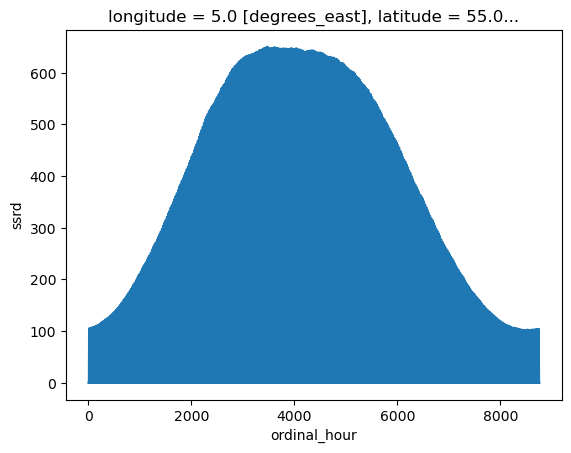

In [14]:
# Sanity checks
ds2 = xr.open_dataset(LOCATION_ERA5NL+'ERA5-NL_HRWclimatology_ssrd.nc', engine='netcdf4')
ds2.ssrd.sel(latitude=55, longitude=5, method='nearest').plot()